In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets/titanic.csv')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
## PREPROCESSING:
# Null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.shape

(891, 12)

In [9]:
(177/891) *100
# more than 10% of data is null ;so they can't be dropped

19.865319865319865

In [12]:
# filling null values with mean value of age
df['Age'].fillna(value = df['Age'].mean(),inplace = True)

In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [55]:
# more than 80% of cabin is null. Hence drop the column
df = df.drop('Cabin', axis = 1)


In [43]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# Analysis:

# 1. the total number of people who survived v/s not survived ?

df.groupby('Survived')['PassengerId'].count()

,PassengerId
Survived,
0,549
1,342


In [21]:
549/891, 342/891

# Only 38% survived in the ship and almost 62% died

(0.6161616161616161, 0.3838383838383838)

In [ ]:
# 2.How is the survival distribution spread across male and female categories?
df.groupby(['Survived','Sex'])['PassengerId'].count()


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [22]:
# out of 342 survivors, we have 233 female and 109 male

(0.6812865497076024, 0.31871345029239767)

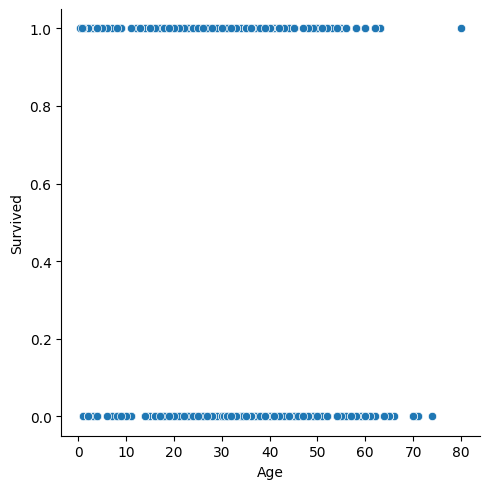

In [ ]:
# 3. Is their Age factor a major contribution to their survival factor ?

sns.relplot(x = df['Age'], y = df['Survived'])

#  the graph shows that, age was not a factor which influenced survival since it shows people of all ages survived and died.


yes, there are outliers in fare column

<Axes: xlabel='Fare', ylabel='Density'>

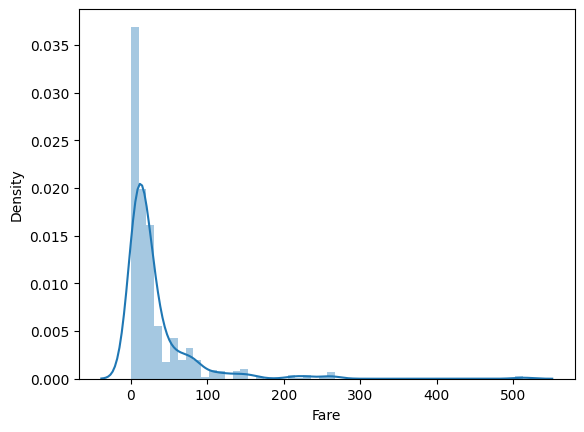

In [26]:
# 5. What does the overall Distribution For fare look like?

sns.distplot(df['Fare'])

# The fare column is positively skewed

In [25]:
df['Fare'].skew()

# A skewness of 4.79 means the Fare distribution is highly positively skewed (right-skewed).
# Majority of the passengers paid low fare while a few passengers paid high fares.

np.float64(4.787316519674893)

In [ ]:
# 6.What is the min, mean and max age in the entire dataset looks like?

df['Age'].min(),df['Age'].max(),df['Age'].mean()

(0.42, 80.0, 29.69911764705882)

In [ ]:
# df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


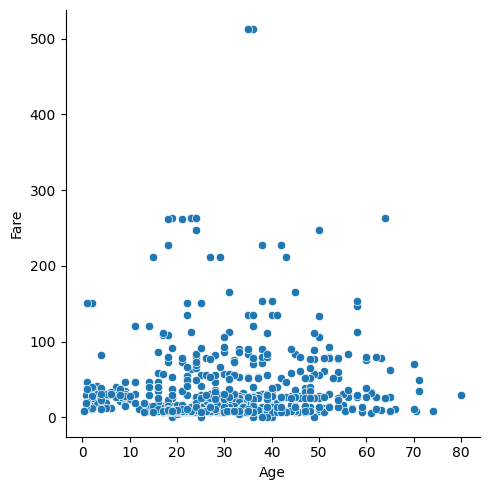

In [ ]:
#7.Is there any specific preference/relation between age and fare price that they opted for?
sns.relplot(x=df['Age'], y = df['Fare'])

# the points seems scattered rather than clustered. so we can presume there is no relation between age and fare. to further check this: we can use correlation function

In [56]:
# checking for alpha values since correlation doesn't work
df.head(3)

df = df.drop('Embarked', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)

In [57]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [58]:
df = df.drop('PassengerId', axis = 1)


In [59]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250


In [60]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


<Axes: >

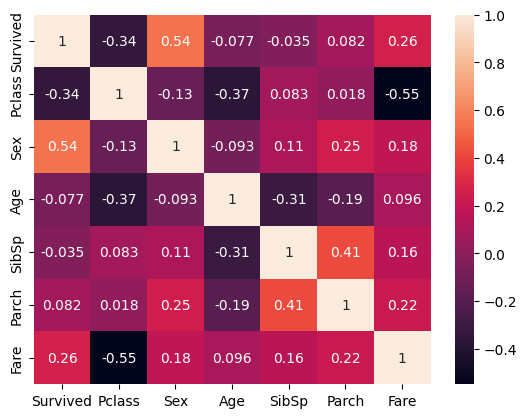

In [62]:
# 8. Correlation
sns.heatmap(df.corr(), annot = True)

- **Fare and survived **have a moderate positive correlation(0.26) this means people who paid more had more chances in survival
- **sex and survived** have strong positive correlation (0.54)
    - when we apply barplot() on these parameters, it confirms, more women seems to have been saved than men. this could be due to children and women to board the safety boats first protocol
- **pclass and survived** have a moderate negative correlation (-0.34)
    - when we apply barplot(), we can see that people who were in third class had lower chances on survival
- **SibSp and Sex** has a weak positive correlation (0.11)
    - when we use a barplot(), we can see that female passengers had slightly more companions (sibling/spouse) travelling with them than male

<Axes: xlabel='Sex', ylabel='Survived'>

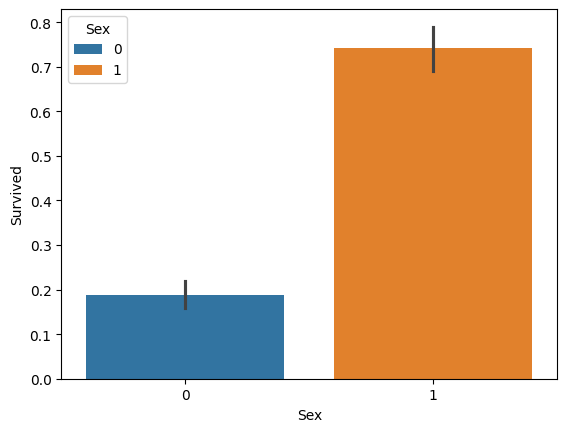

In [ ]:
sns.barplot(x= df['Sex'], y= df['Survived'], hue = df['Sex'] )

<Axes: xlabel='Pclass', ylabel='Survived'>

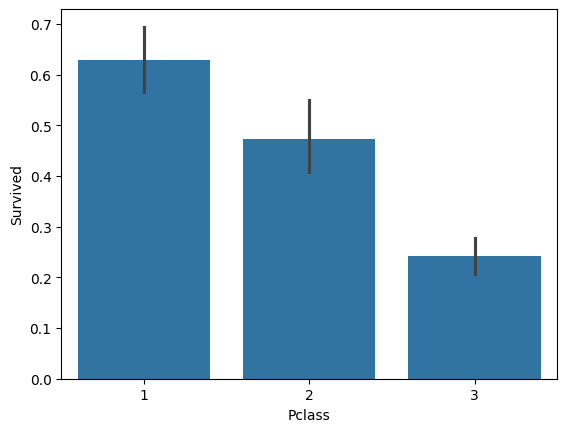

In [ ]:
sns.barplot(x= df['Pclass'], y= df['Survived'] )

<Axes: xlabel='Sex', ylabel='SibSp'>

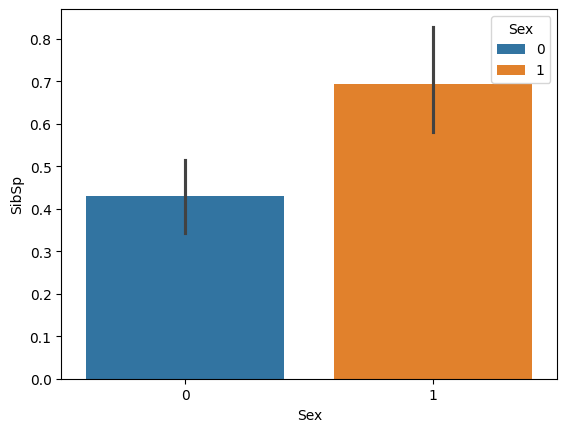

In [ ]:
sns.barplot(x= df['Sex'], y= df['SibSp'], hue = df['Sex'] )

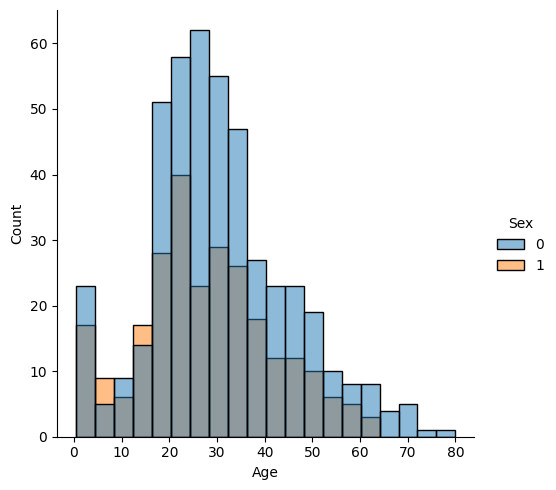

In [ ]:
# 9. How does the distribution of Age look like for both the male and female category?
sns.displot(x= df['Age'], hue = df['Sex'])

The female age distribution likely resembles a normal distribution meaning the majority of female passengers' age was around the mean age and the male age distribuition was slightly positively skewed whoch means the majority of male passengers were young.